<a href="https://colab.research.google.com/github/ovv77/data_science/blob/master/Skillbox_%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_3_%D0%B9_%D0%B4%D0%B5%D0%BD%D1%8C_30_05_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Программа на сегодня (день 2):

1. Функции минимума, максимума, скользящее среднее
2. Гистограмма, квантиль
3. Корреляция параметров
4. Автокорреляция, сезонность
5. Тренд

ДЗ 2: рассмотреть данные по следующей ссылке изученными методами. Написать отчет, в котором должны содержаться следующие пункты:

1) какие выводы можно сделать по данным,

2) какие методы из изученых применимы, какие не применимы для данного датасета и почему.

**Это ДЗ конкурсное, будет выбрано 3 победителя**.

Критерий оценки: детальность отчета.

* ссылка на данные для ДЗ (источник: [Industrial Production: Electric and gas utilities](https://fred.stlouisfed.org/series/IPG2211A2N)):

https://github.com/anastasiarazb/skillbox-data-analyst-intensive/blob/master/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%94%D0%B5%D0%BD%D1%8C%202/IPG2211A2N.xls?raw=true


* ссылка на данные о погоде в Москве за 5 лет (источник: [rp5.ru](https://rp5.ru/%D0%90%D1%80%D1%85%D0%B8%D0%B2_%D0%BF%D0%BE%D0%B3%D0%BE%D0%B4%D1%8B_%D0%B2_%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B5_(%D0%92%D0%94%D0%9D%D0%A5))):

https://github.com/anastasiarazb/skillbox_nlp_demo/blob/master/%D0%9C%D1%81%D0%BA_5%D0%BB%D0%B5%D1%82.xls?raw=true

**Дедлайн:** 18:00 по Мск

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
data = pd.read_excel('https://github.com/anastasiarazb/skillbox-data-analyst-intensive/blob/master/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%94%D0%B5%D0%BD%D1%8C%202/IPG2211A2N.xls?raw=true', skiprows=10)

In [0]:
data

,observation_date,IPG2211A2N
0,1939-01-01,3.3842
1,1939-02-01,3.4100
2,1939-03-01,3.4875
3,1939-04-01,3.5133
4,1939-05-01,3.5133
...,...,...
967,2019-08-01,111.2697
968,2019-09-01,102.0033
969,2019-10-01,93.9993
970,2019-11-01,99.8843


In [0]:
data.columns

Index(['observation_date', 'IPG2211A2N'], dtype='object')

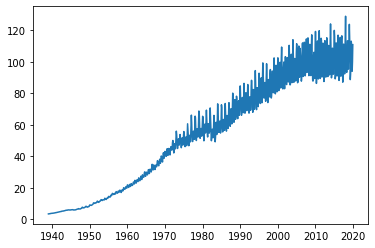

In [0]:
plt.plot(data['observation_date'], data['IPG2211A2N'])

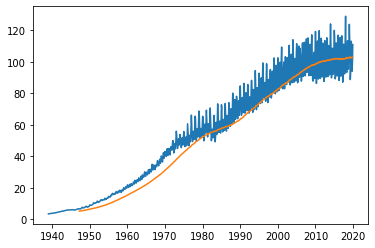

In [0]:
plt.plot(data['observation_date'], data['IPG2211A2N'])
plt.plot(data['observation_date'], data['IPG2211A2N'].rolling(100).mean())

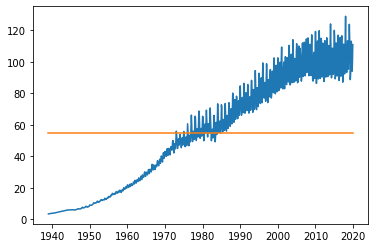

In [0]:
plt.plot(data['observation_date'], data['IPG2211A2N'])
plt.plot(data['observation_date'], [data['IPG2211A2N'].mean()]*len(data))

In [0]:
# Данные даны за слишком длительный период - очень большой участок не актуален, среднний, максимальный, минимальный показатель нам ни о чем не говорит

In [0]:
first_date = pd.Timestamp(year=2015, month=1, day=1)
data2 = data[data['observation_date'] > first_date]

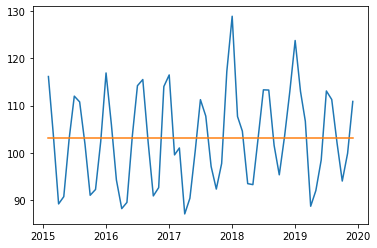

In [0]:
plt.plot(data2['observation_date'], data2['IPG2211A2N'])
plt.plot(data2['observation_date'], [data2['IPG2211A2N'].mean()]*len(data2))

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
N = len(data2)
x_range = pd.DataFrame(list(range(N)))
# x_range

In [0]:
N

59

In [0]:
regressor = LinearRegression()
regressor.fit(x_range, data2['IPG2211A2N'])
result = regressor.predict(x_range)

In [0]:
len(result)

59

In [0]:
len(data2['observation_date'])

59

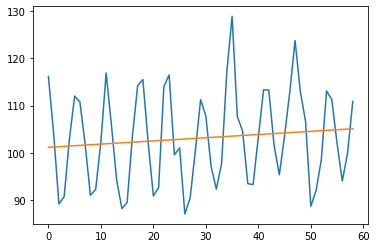

In [0]:
plt.plot(x_range.index, data2['IPG2211A2N'])
plt.plot(x_range.index, result)

In [0]:
quant_95 = [data2['IPG2211A2N'].quantile(0.95)] * N
quant_05 = [data2['IPG2211A2N'].quantile(0.05)] * N

In [0]:
# Коридор, в который попадает 90% значений

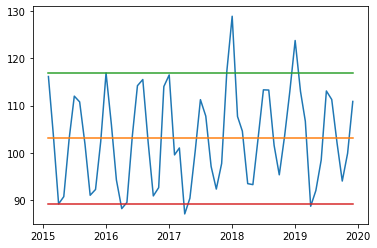

In [0]:
plt.plot(data2['observation_date'], data2['IPG2211A2N'])
plt.plot(data2['observation_date'], [data2['IPG2211A2N'].mean()]*len(data2))
plt.plot(data2['observation_date'], quant_95)
plt.plot(data2['observation_date'], quant_05)

In [0]:
# Автокорреляция: смотрим сезонность

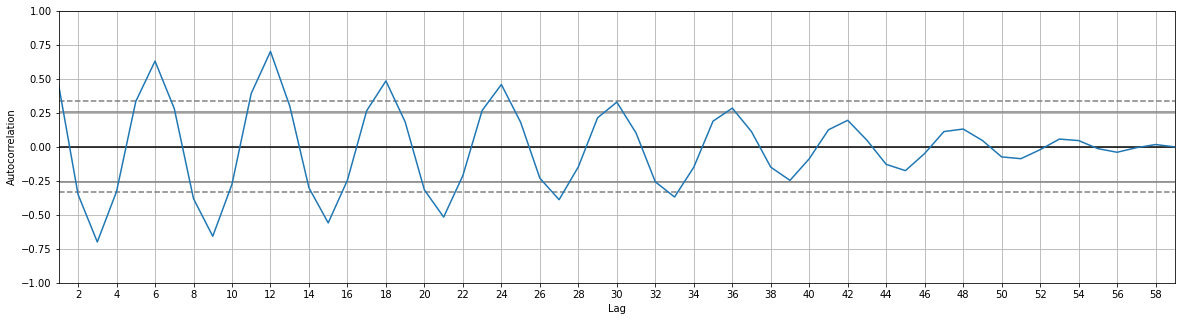

In [0]:
# График сезонности за последние 5 лет: ярко выражена годовая и полугодовая сезонность
plt.figure(figsize=(20, 5))
pd.plotting.autocorrelation_plot(data2['IPG2211A2N'])
plt.locator_params(axis='x', nbins=50)

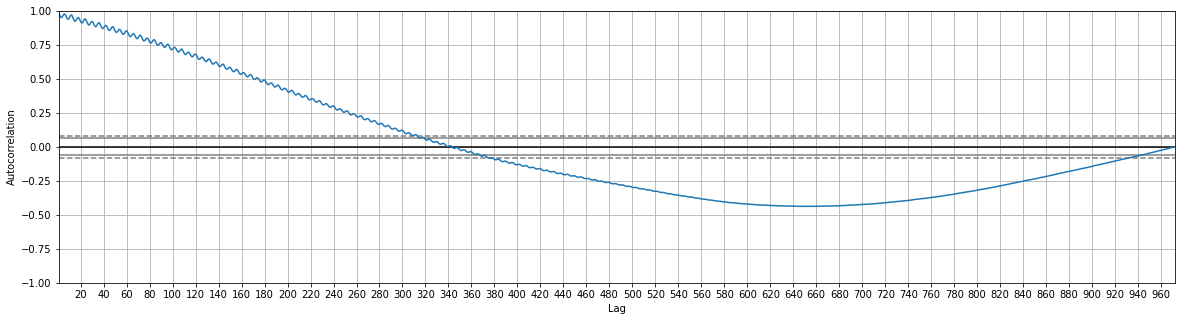

In [0]:
# График автокорреляции для всех данных с 1940 года: ничего нельзя сказать о сезонности
plt.figure(figsize=(20, 5))
pd.plotting.autocorrelation_plot(data['IPG2211A2N'])
plt.locator_params(axis='x', nbins=50)

In [0]:
# 1) Из рассмотренных методов к данным о производстве газа применим тренд
# 2) Очень большой отрезок данных нерелевантен (как минимум до 2010 года стоило отбросить данные)
# 3) После 2015 года наблюдвается ярко выраженная полугодовая сезонность в данных
# 4) После 2015 года имеет смысл исследовать вероятностный диапазон значений, среднее и т.п. характеристики, для всего датасета результат этих функций не имеет смысла


In [0]:
print('Минимум с 2015 по 2020 год:', data['IPG2211A2N'].min())
print('Максимум с 2015 по 2020 год:', data['IPG2211A2N'].max())
print('Среднее с 2015 по 2020 год:', data['IPG2211A2N'].mean())

Минимум с 2015 по 2020 год: 3.3842
Максимум с 2015 по 2020 год: 128.9071
Среднее с 2015 по 2020 год: 54.8019669753087


In [0]:
# Модели для предсказания сезонности: ARIMA, (ARMA, AMA, SARIMA, SARIMAX, garch)